In [1]:
# Dependencies
import json
import requests as req
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# Define weather_result function

def weather_json_function(lat, lon):
    api_key = "7f3ea21f4ed25571bd291209575db3b8"
    url = "http://api.openweathermap.org/data/2.5/forecast?"
    units = "imperial"
    weather_json = req.get(url + "appid=" + api_key + "&lat=" + str(lat) + "&lon=" + str(lon) + "&units=" + units).json()
    if weather_json['city']['coord'] != {}:
        result = {'City': weather_json['city']['name'], 
                  'Country': weather_json['city']['country'],
                  'Date': weather_json["list"][0]["dt"], 
                  'Lat': lat,
                  'Lon': lon,
                  'Max Temp': weather_json["list"][0]["main"]["temp_max"], 
                  'Humidity': weather_json["list"][0]["main"]["humidity"], 
                  'Cloudiness': weather_json["list"][0]["clouds"]["all"],
                  'Wind Speed': weather_json["list"][0]["wind"]["speed"]}
        print(url + "appid=" + api_key + "&lat=" + str(lat) + "&lon=" + str(lon))
    else:
        result = []
    return result

In [3]:
# Save config information
n = 0
list = []

while n != 100:
    lat = random.uniform(-1, 1) * 90
    lon = random.uniform(-1, 1) * 180
    #print(lat, lon)
    result = weather_json_function(lat, lon)
    if result != []:        
        #print(result)       
        list.append(result)
        n = n + 1

df = pd.DataFrame(list) 

df = df[['City', 'Country', 'Date', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

df.count()

http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=24.536097402473914&lon=30.99120057751463
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=71.59750184535429&lon=-57.44552539957836
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=68.40905226337645&lon=71.19601470095697
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=7.904837015111963&lon=-0.8502153828636372
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=25.051097801186913&lon=110.61265702902925
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=22.320747815136276&lon=112.56370673083678
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=62.41050854741904&lon=-162.07612305183864
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd2

http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=58.142712320325806&lon=25.62498600284058
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=60.94583147965025&lon=50.56553624342527
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=-23.7228635837273&lon=19.64536336004761
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=4.857344455179204&lon=-6.673170312708607
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=2.6380708708790013&lon=-64.49226944028149
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=5.3764236112234665&lon=143.1359278728856
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd291209575db3b8&lat=6.707949825479442&lon=-13.290600492794663
http://api.openweathermap.org/data/2.5/forecast?appid=7f3ea21f4ed25571bd2912

City          100
Country       100
Date          100
Lat           100
Lon           100
Max Temp      100
Humidity      100
Cloudiness    100
Wind Speed    100
dtype: int64

In [4]:
df.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Al Kharijah,EG,1513555200,24.536097,30.991201,52.29,79,8,7.96
1,Upernavik,GL,1513555200,71.597502,-57.445525,26.82,100,80,18.92
2,Mys-Kamennyy,RU,1513555200,68.409052,71.196015,16.47,87,80,10.65
3,Brong-Ahafo Region,GH,1513555200,7.904837,-0.850215,79.25,74,0,8.52
4,Gongcheng,CN,1513555200,25.051098,110.612657,26.65,82,0,4.16


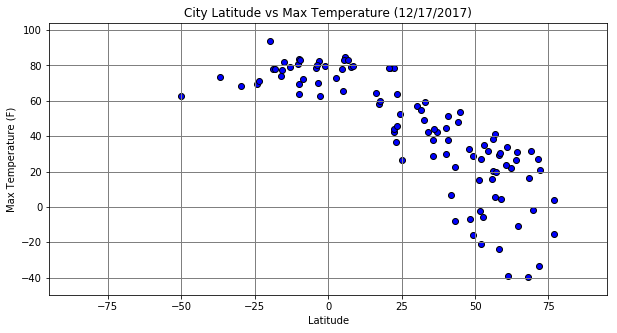

In [5]:
plt.figure(figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=1)

plt.scatter(df['Lat'], df['Max Temp'], marker = "o",
            color = "blue", alpha = 1,
            edgecolor = "black", linewidths = 1)

plt.xlim(-95, 95)
plt.ylim(df['Max Temp'].min()-10, df['Max Temp'].max()+10)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Max Temperature (12/17/2017)")

plt.show()

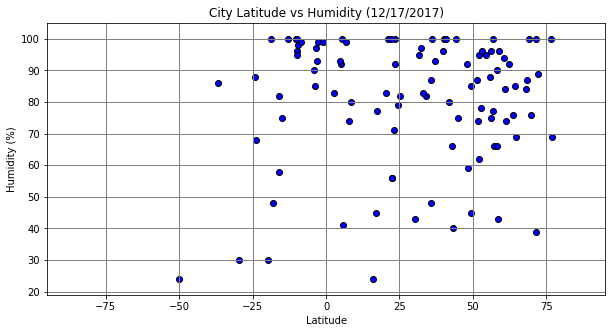

In [6]:
plt.figure(figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=1)

plt.scatter(df['Lat'], df['Humidity'], marker = "o",
            color = "blue", alpha = 1,
            edgecolor = "black", linewidths = 1)

plt.xlim(-95, 95)
plt.ylim(df['Humidity'].min()-5, df['Humidity'].max()+5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity (12/17/2017)")

plt.show()

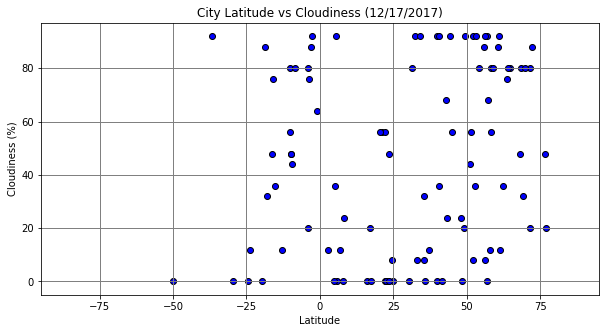

In [7]:
plt.figure(figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=1)

plt.scatter(df['Lat'], df['Cloudiness'], marker = "o",
            color = "blue", alpha = 1,
            edgecolor = "black", linewidths = 1)

plt.xlim(-95, 95)
plt.ylim(df['Cloudiness'].min()-5, df['Cloudiness'].max()+5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness (12/17/2017)")

plt.show()

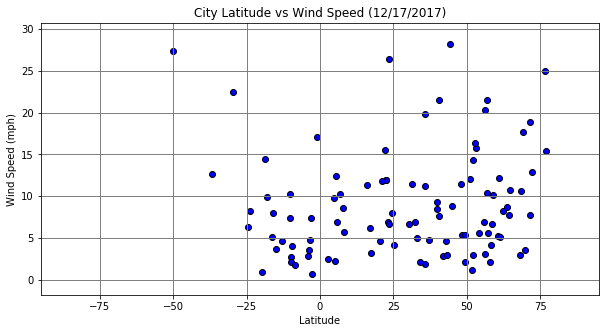

In [8]:
plt.figure(figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=1)

plt.scatter(df['Lat'], df['Wind Speed'], marker = "o",
            color = "blue", alpha = 1,
            edgecolor = "black", linewidths = 1)

plt.xlim(-95, 95)
plt.ylim(df['Wind Speed'].min()-2.5, df['Wind Speed'].max()+2.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (12/17/2017)")

plt.show()